# 3531. Count Covered Buildings

You are given a positive integer n, representing an n x n city. You are also given a 2D grid buildings, where buildings[i] = [x, y] denotes a unique building located at coordinates [x, y].

A building is covered if there is at least one building in all four directions: left, right, above, and below.

Return the number of covered buildings.

 

Example 1:

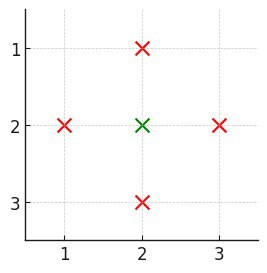


Input: n = 3, buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]

Output: 1

Explanation:

Only building [2,2] is covered as it has at least one building:
above ([1,2])
below ([3,2])
left ([2,1])
right ([2,3])
Thus, the count of covered buildings is 1.
Example 2:

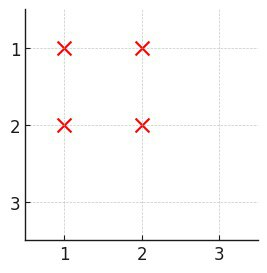

Input: n = 3, buildings = [[1,1],[1,2],[2,1],[2,2]]

Output: 0

Explanation:

No building has at least one building in all four directions.
Example 3:

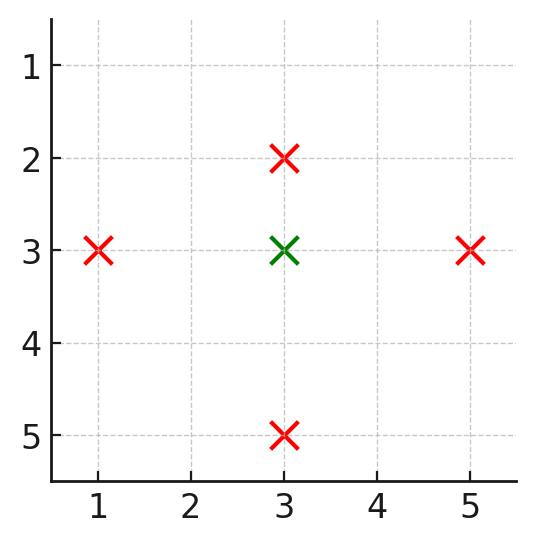

Input: n = 5, buildings = [[1,3],[3,2],[3,3],[3,5],[5,3]]

Output: 1

Explanation:

Only building [3,3] is covered as it has at least one building:
above ([1,3])
below ([5,3])
left ([3,2])
right ([3,5])
Thus, the count of covered buildings is 1.
 

Constraints:

2 <= n <= 105
1 <= buildings.length <= 105 
buildings[i] = [x, y]
1 <= x, y <= n
All coordinates of buildings are unique.


## Solution:
A covered building has to be bounded in all 4 directions. So for each row and column we need the maximum and minimum value
Use Hashmaps for grouping
1. Group buildings by x- store everything but the min x and max x in a set say setx-- as the middle buidlings are covered
2. Group buildings by y- store everything but the min y and max y in a set in a set say sety-- as the middle buidlings are covered
3. Run set intersection and return its length

In [39]:
# buildings = [[1,1],[2,3],[3,3],[2,2],[1,3]]
buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]
buildings.sort(key=lambda x:(x[0],x[1])) #Grouped and sorted by x coordinate
prev=-1
setx=set()
for i in range(2,len(buildings)):
    if buildings[i-1][0]==buildings[i-2][0] and buildings[i-1][0]==buildings[i][0]:
        setx.add((buildings[i-1][0],buildings[i-1][1]))
buildings.sort(key=lambda x:(x[1],x[0])) #Grouped and sorted by y coordinate
prev=-1
sety=set()
for i in range(2,len(buildings)):
    if buildings[i-1][1]==buildings[i-2][1] and buildings[i-1][1]==buildings[i][1]:
        sety.add((buildings[i-1][0],buildings[i-1][1]))
len(setx.intersection(sety))

1

## Efficient Solution: Instead of sorting, store the min and max of x and y in a data structure

In [57]:
# buildings = [[1,1],[2,3],[3,3],[2,2],[1,3]]
buildings = [[1,2],[2,1],[3,1],[2,3],[3,3],[2,2],[3,2]]
n=3
minx=[float('inf')]*(n+1) # ith index store min x coordinate of ith column. Similarly, the others follow
maxx=[float('-inf')]*(n+1)
miny=[float('inf')]*(n+1) # ith index store min y coordinate of ith row. Similarly, the others follow
maxy=[float('-inf')]*(n+1)

for x,y in buildings:
    minx[y]=min(minx[y],x)
    maxx[y]=max(maxx[y],x)
    miny[x]=min(miny[x],y)
    maxy[x]=max(maxy[x],y)

# Now for each x,y in buildings see if x lies between minx and maxx of that particular column 
# and y lies between miny and maxy of that particular row. Increment count for such coordinates
res=0
for x,y in buildings:
    if minx[y]<x<maxx[y] and miny[x]<y<maxy[x]:
        res+=1
res

1

In [55]:
minx,maxx

([inf, 2, 1, 2], [-inf, 3, 3, 3])

In [56]:
miny,maxy

([inf, 2, 1, 2], [-inf, 2, 2, 3])